# Dimensionality Reduction: Visualizing MDS and Hierarchical Clustering Outputs

This notebook helps visualize the outputs of MDS and hierarchical clustering.

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.manifold import MDS

subject = 'sub-15'  # Example subject

base_dir = '/home/hmueller2/ibc_code'

## Load RSM Data

RSM shape: (50, 50)
RDM shape: (50, 50)


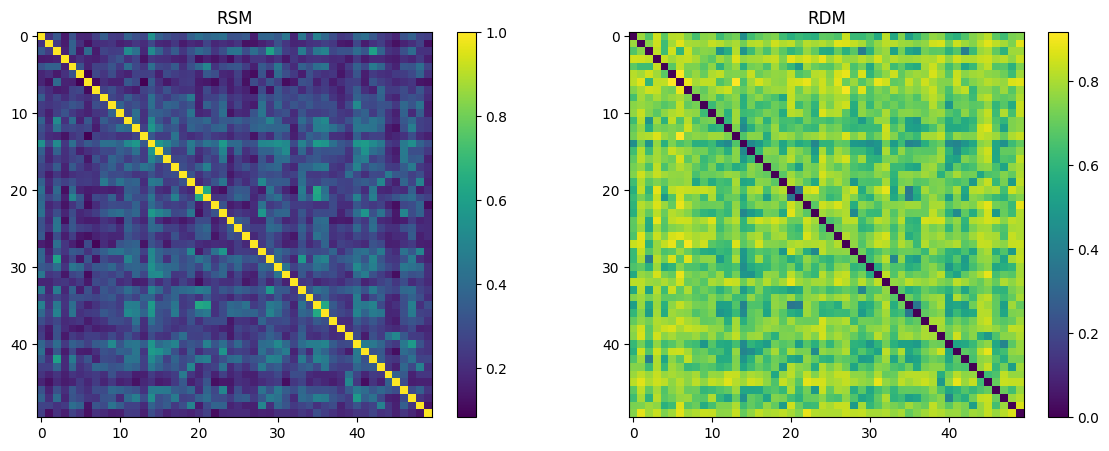

In [3]:
def load_rsm(file_path):
    return np.load(file_path)

def load_rdm(file_path):
    return np.load(file_path)

rsm_dir = os.path.join(base_dir, 'ibc_output_RA', 'raw', 'topographic_alignment', 'rsm')
rdm_dir = os.path.join(base_dir, 'ibc_output_RA', 'raw', 'topographic_alignment', 'rdm')

rsm_file = os.path.join(rsm_dir, f'topographic_alignment_rsm_{subject}.npy')
rdm_file = os.path.join(rdm_dir, f'topographic_alignment_rdm_{subject}.npy')

rsm = load_rsm(rsm_file)
rdm = load_rdm(rdm_file)

print("RSM shape:", rsm.shape)
print("RDM shape:", rdm.shape)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.imshow(rsm, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title('RSM')

plt.subplot(1, 2, 2)
plt.imshow(rdm, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title('RDM')

plt.show()

## MDS Visualization

Comparing Clustering Techniques - Hierarchical vs KMeans:

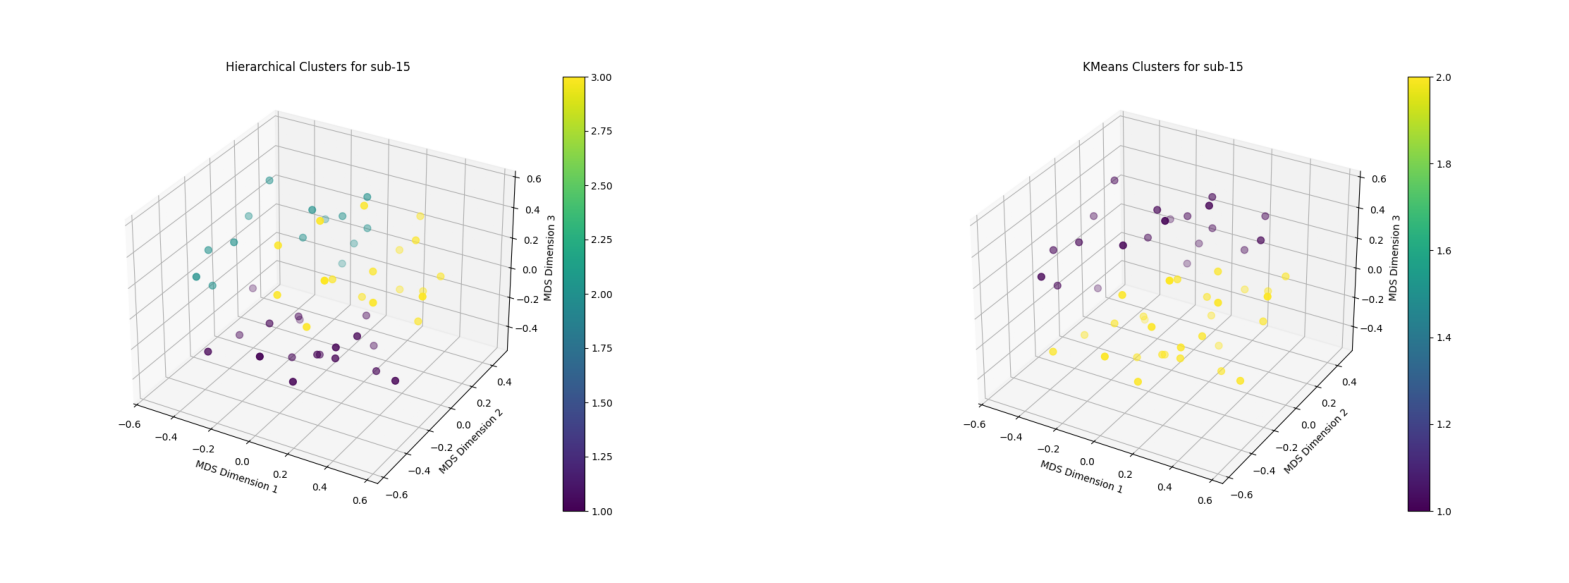

In [10]:
subject = 'sub-15'  # Specify the subject

# Define the directory and file paths
mds_dir = '/home/hmueller2/ibc_code/ibc_output_MDS/run_10-3d-2clusters'
hierarchical_file = os.path.join(mds_dir, f'clusters_Hierarchical Clusters for {subject}_{subject}_3d.png')
kmeans_file = os.path.join(mds_dir, f'clusters_KMeans Clusters for {subject}_{subject}_3d.png')

# Load and display the images
fig, axes = plt.subplots(1, 2, figsize=(20, 12))

hierarchical_img = plt.imread(hierarchical_file)
axes[0].imshow(hierarchical_img)
axes[0].axis('off')

kmeans_img = plt.imread(kmeans_file)
axes[1].imshow(kmeans_img)
axes[1].axis('off')

plt.show()

In [11]:
# Higher Resolution for subject 01
# Instead of opening the images, we can load the data and plot it using matplotlib
subject = 'sub-15'  # Specify the subject

# Load the data
hierarchical_data = np.load(os.path.join(mds_dir, f'clusters_Hierarchical Clusters for {subject}_{subject}_3d.npy'))
kmeans_data = np.load(os.path.join(mds_dir, f'clusters_KMeans Clusters for {subject}_{subject}_3d.npy'))


FileNotFoundError: [Errno 2] No such file or directory: '/home/hmueller2/ibc_code/ibc_output_MDS/run_10-3d-2clusters/clusters_Hierarchical Clusters for sub-15_sub-15_3d.npy'

# Visualize Task representations between clusters

### 2 Clusters:

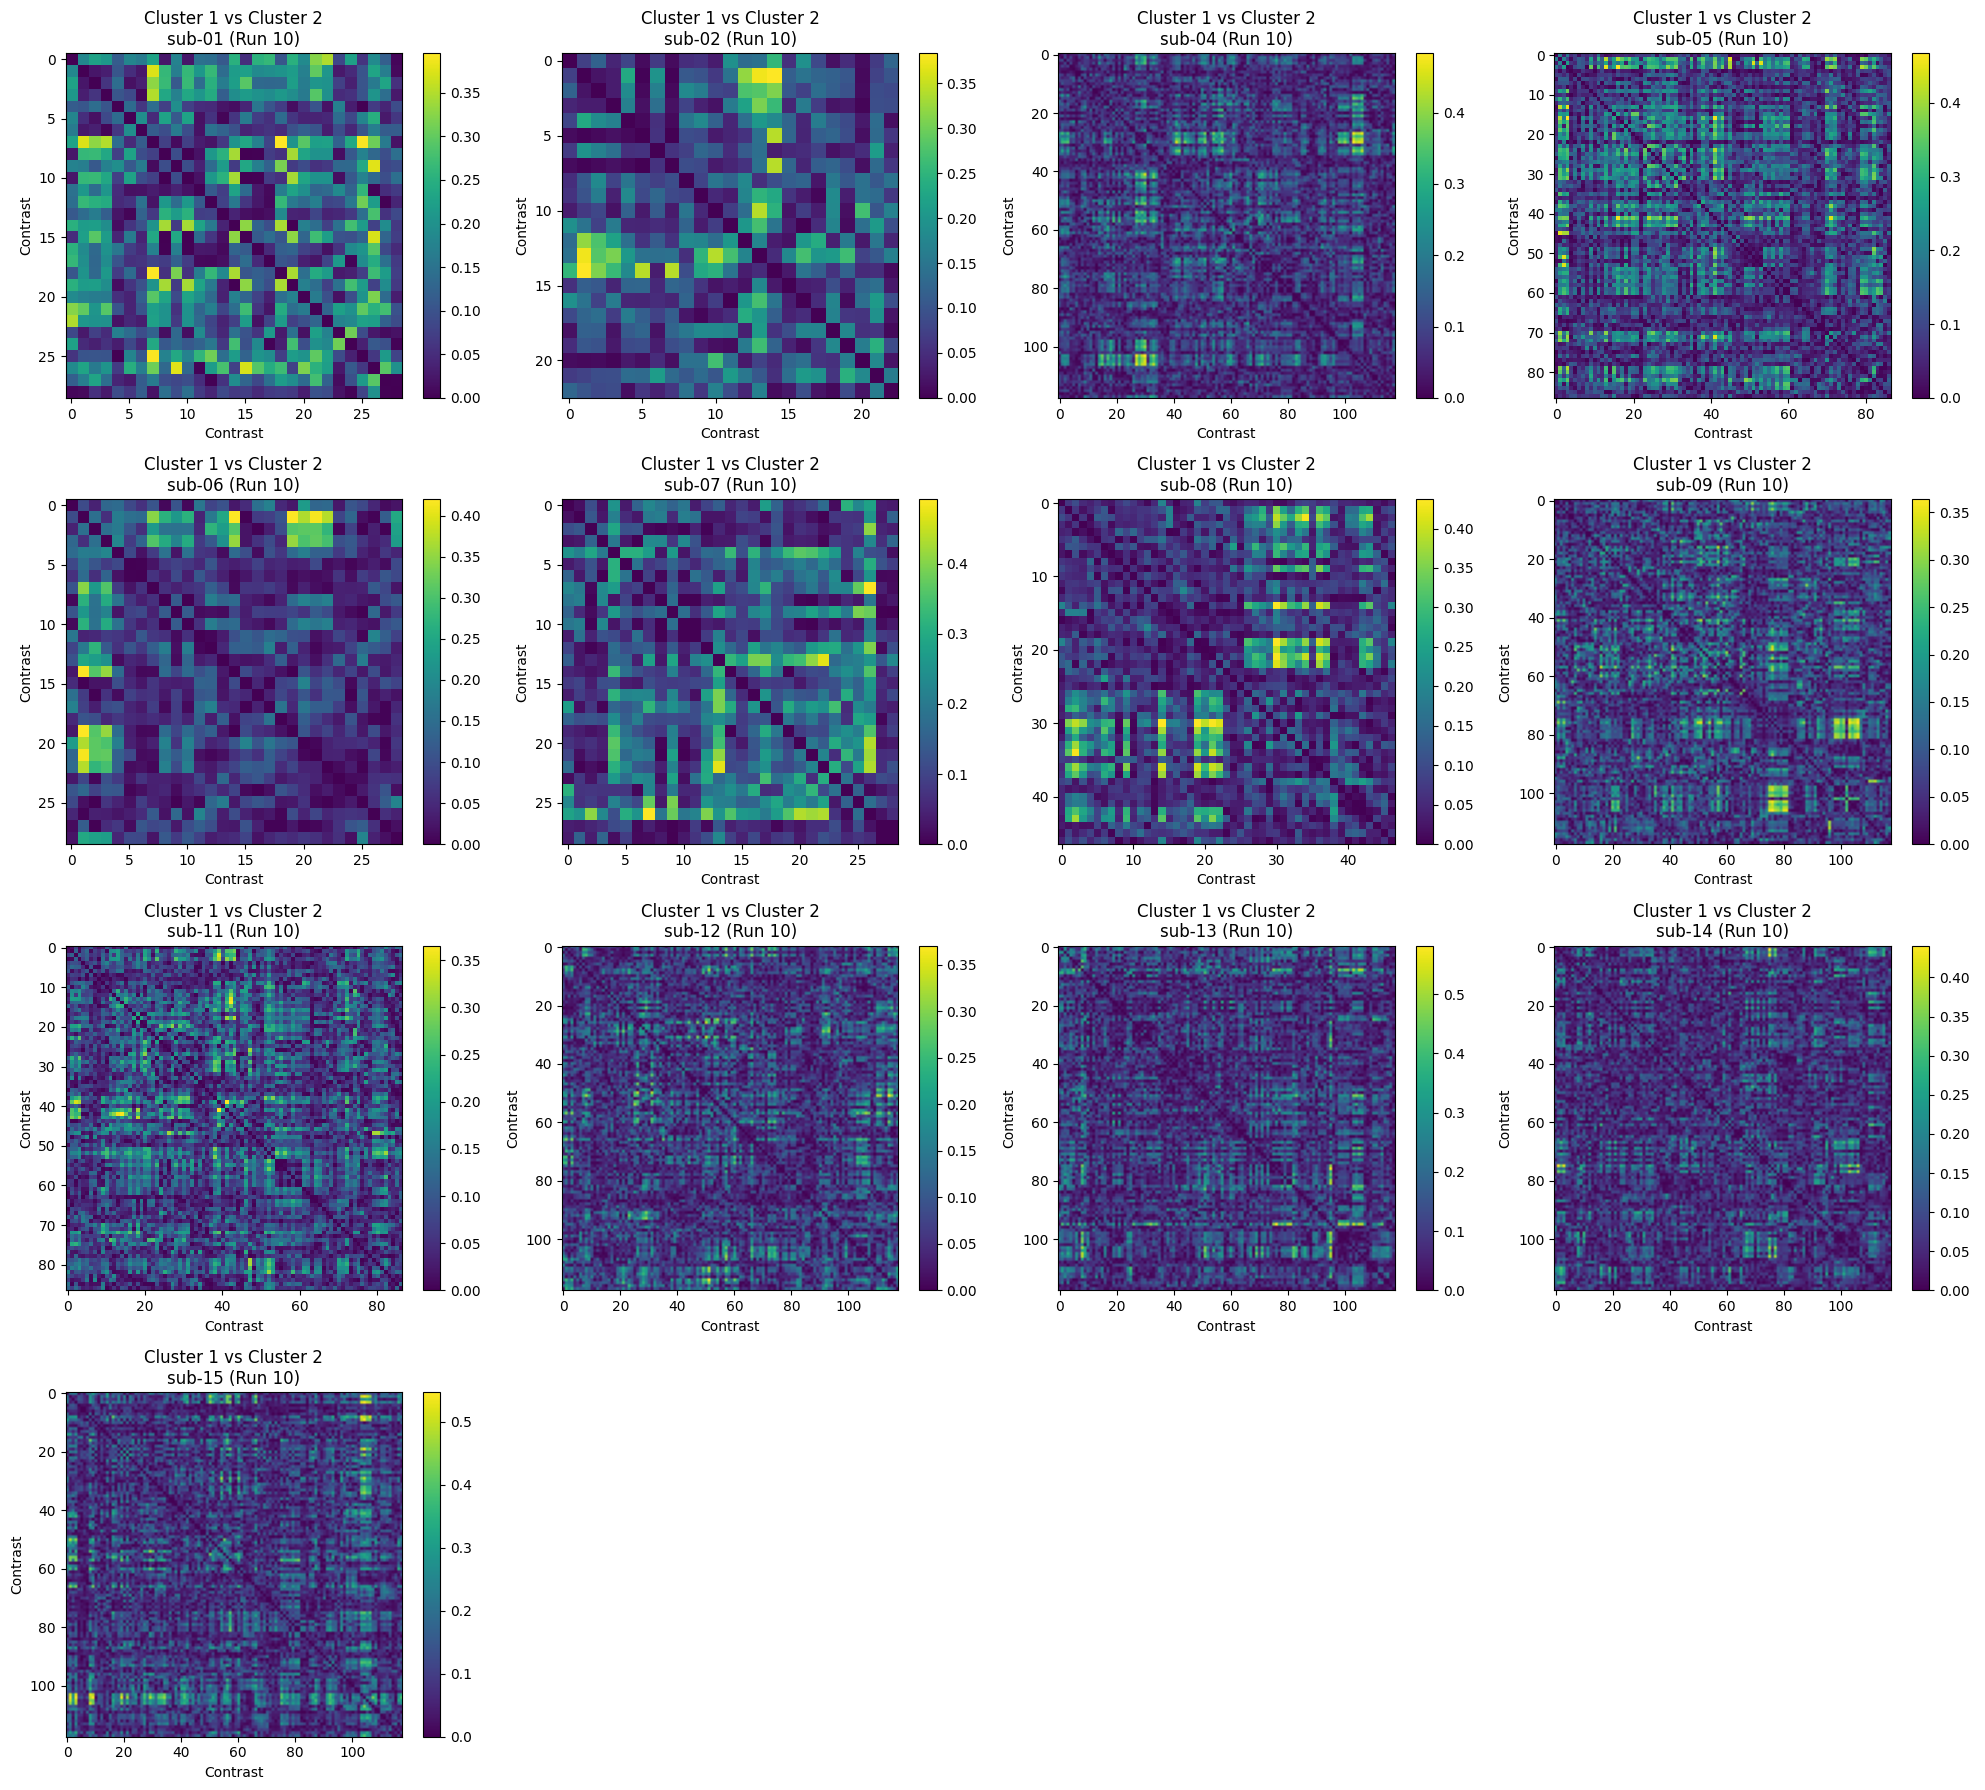

In [16]:
subjects = [f'sub-{i:02d}' for i in range(1, 16) if i not in [3, 10]]
run = '10'  # Specify the run
cluster1 = 1
cluster2 = 2

fig, axes = plt.subplots(4, 4, figsize=(20, 18))

for idx, subject in enumerate(subjects):
    row = idx // 4
    col = idx % 4
    # Load the Euclidean Distance data (Average_RSM_Cluster_1 - Average_RSM_Cluster_2)
    distance_file = os.path.join(base_dir, 'ibc_output_KMeans_onMDS', f'run_{run}', f'{cluster1}-{cluster2}_{subject}.csv')
    distance_data = np.loadtxt(distance_file, delimiter=',', skiprows=1)

    ax = axes[row, col]
    im = ax.imshow(distance_data, aspect='auto', cmap='viridis')
    ax.set_title(f'Cluster {cluster1} vs Cluster {cluster2}\n{subject} (Run {run})')
    ax.set_xlabel('Contrast')
    ax.set_ylabel('Contrast')
    fig.colorbar(im, ax=ax)

# Hide any unused subplots
for idx in range(len(subjects), 16):
    row = idx // 4
    col = idx % 4
    axes[row, col].axis('off')

plt.tight_layout()
plt.savefig('cluster_RSM_comparison.png', dpi=300)

plt.show()

### 3 Clusters:

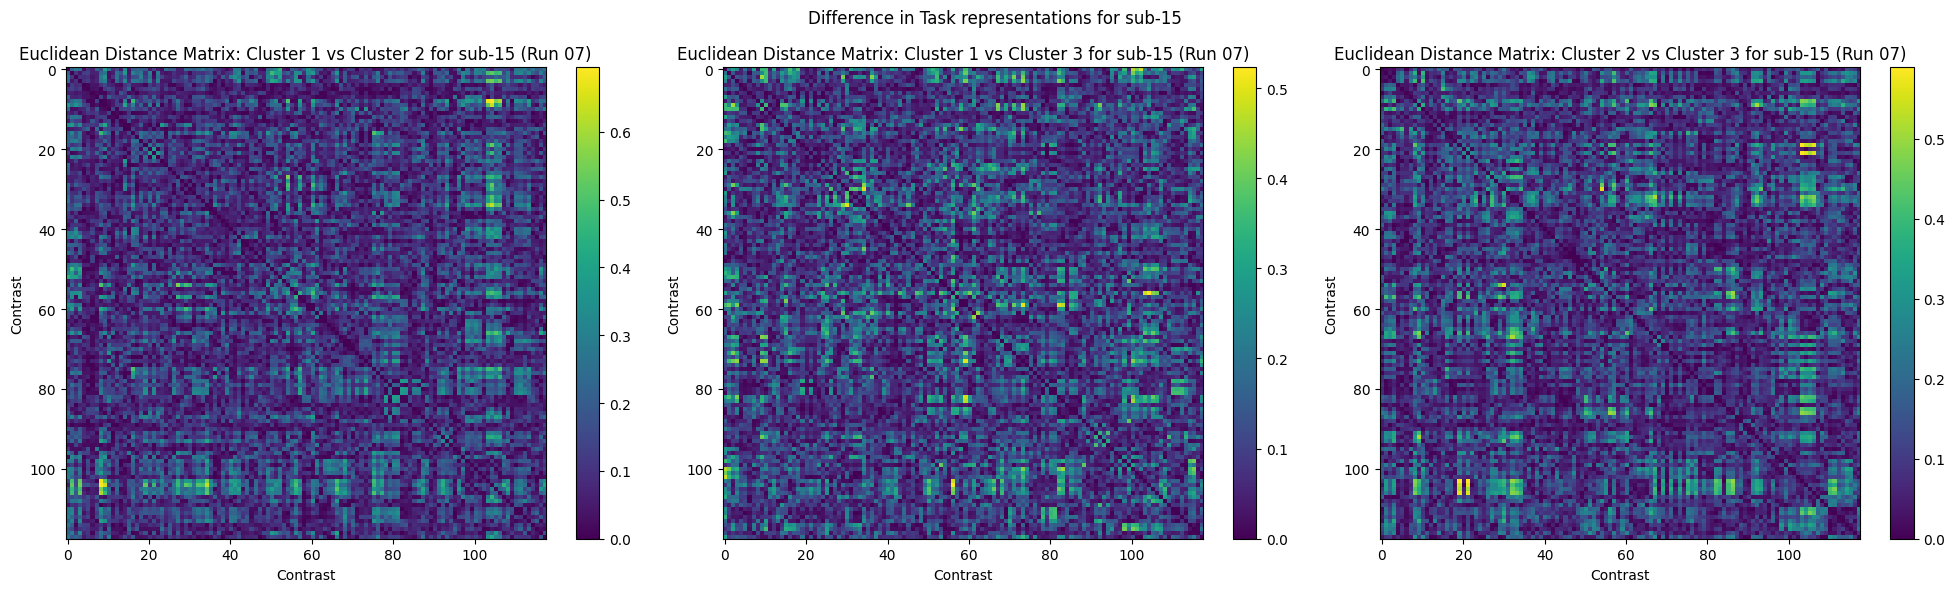

In [6]:
subject = 'sub-15'  # Specify the subject
run = '07'  # Specify the run
cluster1 = 1
cluster2 = 2
cluster3 = 3

# Load the Euclidean Distance data for Cluster 1-2, 1-3, and 2-3
distance_file_1_2 = os.path.join(base_dir, 'ibc_output_KMeans_onMDS', f'run_{run}', f'{cluster1}-{cluster2}_{subject}.csv')
distance_file_1_3 = os.path.join(base_dir, 'ibc_output_KMeans_onMDS', f'run_{run}', f'{cluster1}-{cluster3}_{subject}.csv')
distance_file_2_3 = os.path.join(base_dir, 'ibc_output_KMeans_onMDS', f'run_{run}', f'{cluster2}-{cluster3}_{subject}.csv')

distance_data_1_2 = np.loadtxt(distance_file_1_2, delimiter=',', skiprows=1)
distance_data_1_3 = np.loadtxt(distance_file_1_3, delimiter=',', skiprows=1)
distance_data_2_3 = np.loadtxt(distance_file_2_3, delimiter=',', skiprows=1)

plt.figure(figsize=(20, 6))
plt.suptitle(f'Difference in Task representations for {subject}')

plt.subplot(1, 3, 1)
plt.imshow(distance_data_1_2, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title(f'Euclidean Distance Matrix: Cluster {cluster1} vs Cluster {cluster2} for {subject} (Run {run})')
plt.xlabel('Contrast')
plt.ylabel('Contrast')

plt.subplot(1, 3, 2)
plt.imshow(distance_data_1_3, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title(f'Euclidean Distance Matrix: Cluster {cluster1} vs Cluster {cluster3} for {subject} (Run {run})')
plt.xlabel('Contrast')
plt.ylabel('Contrast')

plt.subplot(1, 3, 3)
plt.imshow(distance_data_2_3, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title(f'Euclidean Distance Matrix: Cluster {cluster2} vs Cluster {cluster3} for {subject} (Run {run})')
plt.xlabel('Contrast')
plt.ylabel('Contrast')

plt.tight_layout()
plt.show()

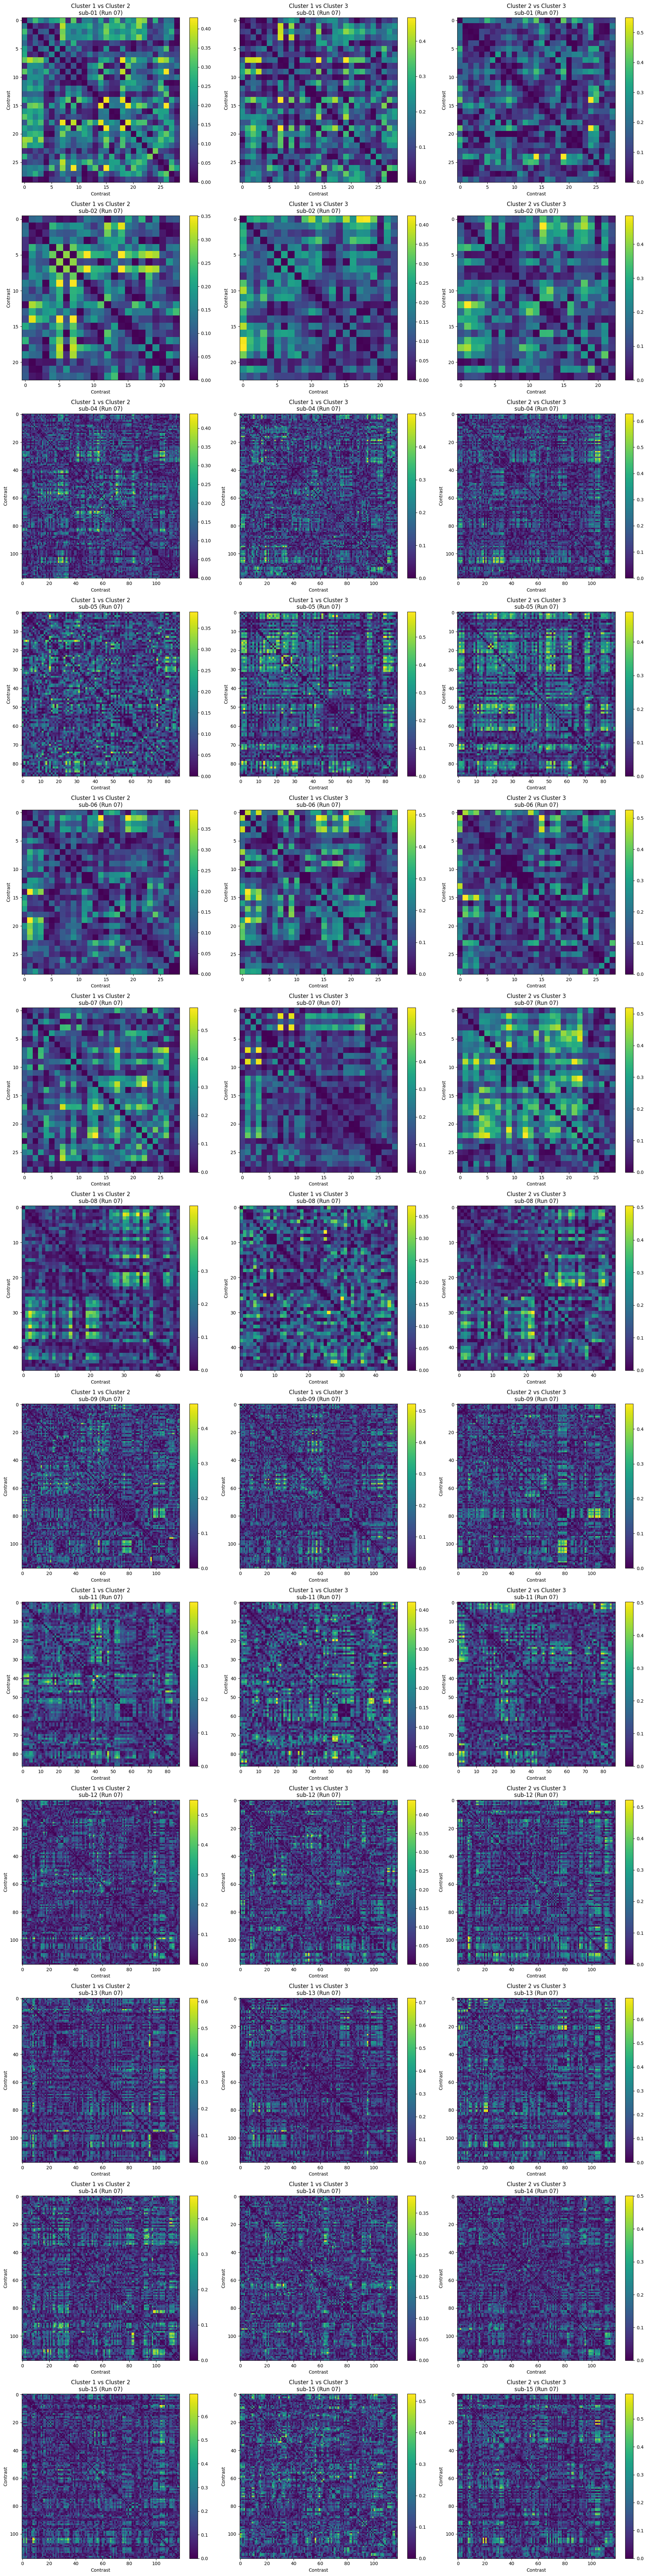

In [ ]:
subjects = [f'sub-{i:02d}' for i in range(1, 16) if i not in [3, 10]]
run = '07'  # Specify the run
cluster1 = 1
cluster2 = 2
cluster3 = 3

fig, axes = plt.subplots(len(subjects), 3, figsize=(20, 6 * len(subjects)))

for idx, subject in enumerate(subjects):
    distance_file_1_2 = os.path.join(base_dir, 'ibc_output_KMeans_onMDS', f'run_{run}', f'{cluster1}-{cluster2}_{subject}.csv')
    distance_file_1_3 = os.path.join(base_dir, 'ibc_output_KMeans_onMDS', f'run_{run}', f'{cluster1}-{cluster3}_{subject}.csv')
    distance_file_2_3 = os.path.join(base_dir, 'ibc_output_KMeans_onMDS', f'run_{run}', f'{cluster2}-{cluster3}_{subject}.csv')

    distance_data_1_2 = np.loadtxt(distance_file_1_2, delimiter=',', skiprows=1)
    distance_data_1_3 = np.loadtxt(distance_file_1_3, delimiter=',', skiprows=1)
    distance_data_2_3 = np.loadtxt(distance_file_2_3, delimiter=',', skiprows=1)

    im1 = axes[idx, 0].imshow(distance_data_1_2, aspect='auto', cmap='viridis')
    axes[idx, 0].set_title(f'Cluster {cluster1} vs Cluster {cluster2}\n{subject} (Run {run})')
    axes[idx, 0].set_xlabel('Contrast')
    axes[idx, 0].set_ylabel('Contrast')
    fig.colorbar(im1, ax=axes[idx, 0])

    im2 = axes[idx, 1].imshow(distance_data_1_3, aspect='auto', cmap='viridis')
    axes[idx, 1].set_title(f'Cluster {cluster1} vs Cluster {cluster3}\n{subject} (Run {run})')
    axes[idx, 1].set_xlabel('Contrast')
    axes[idx, 1].set_ylabel('Contrast')
    fig.colorbar(im2, ax=axes[idx, 1])

    im3 = axes[idx, 2].imshow(distance_data_2_3, aspect='auto', cmap='viridis')
    axes[idx, 2].set_title(f'Cluster {cluster2} vs Cluster {cluster3}\n{subject} (Run {run})')
    axes[idx, 2].set_xlabel('Contrast')
    axes[idx, 2].set_ylabel('Contrast')
    fig.colorbar(im3, ax=axes[idx, 2])

plt.tight_layout()
plt.show()

In [18]:
def load_contrast_names(file_path):
    with open(file_path, 'r') as file:
        contrast_names = file.read().splitlines()
    return contrast_names

# Load contrast names for the given subject
subject = 'sub-12'  # Specify the subject
contrast_file = f'/home/hmueller2/ibc_code/ibc_output_RSA_cosine/{subject}/contrast_names_{subject}.txt'
contrast_names = load_contrast_names(contrast_file)

# Find the indices of the maximum dissimilarity in each distance matrix
max_idx_1_2 = np.unravel_index(np.argmax(distance_data_1_2, axis=None), distance_data_1_2.shape)
max_idx_1_3 = np.unravel_index(np.argmax(distance_data_1_3, axis=None), distance_data_1_3.shape)
max_idx_2_3 = np.unravel_index(np.argmax(distance_data_2_3, axis=None), distance_data_2_3.shape)

# Output the top 4 task contrasts with the highest dissimilarity for each cluster comparison
def get_top_dissimilarities(distance_data, contrast_names, top_n=4):
    flat_indices = np.argsort(distance_data, axis=None)[-top_n:]
    top_indices = [np.unravel_index(idx, distance_data.shape) for idx in flat_indices]
    top_dissimilarities = [(contrast_names[i], contrast_names[j], distance_data[i, j]) for i, j in top_indices]
    return top_dissimilarities

top_1_2 = get_top_dissimilarities(distance_data_1_2, contrast_names)
top_1_3 = get_top_dissimilarities(distance_data_1_3, contrast_names)
top_2_3 = get_top_dissimilarities(distance_data_2_3, contrast_names)

print("Top 4 dissimilarities in Cluster 1 vs Cluster 2:")
for contrast1, contrast2, value in top_1_2:
    print(f"{contrast1} vs {contrast2}: {value}")

print("\nTop 4 dissimilarities in Cluster 1 vs Cluster 3:")
for contrast1, contrast2, value in top_1_3:
    print(f"{contrast1} vs {contrast2}: {value}")

print("\nTop 4 dissimilarities in Cluster 2 vs Cluster 3:")
for contrast1, contrast2, value in top_2_3:
    print(f"{contrast1} vs {contrast2}: {value}")

Top 4 dissimilarities in Cluster 1 vs Cluster 2:
Attention_spatial_incongruent-spatial_congruent vs VSTMC_resp_load3-load1: 0.6775166897276881
VSTMC_resp_load3-load1 vs Attention_spatial_incongruent-spatial_congruent: 0.6775166897276881
Attention_spatial_incongruent-spatial_congruent vs VSTMC_stim: 0.6951098851181186
VSTMC_stim vs Attention_spatial_incongruent-spatial_congruent: 0.6951098851181186

Top 4 dissimilarities in Cluster 1 vs Cluster 3:
SelectiveStopSignal_ignore-stop vs MathLanguage_geometry-othermath: 0.5053363578697858
MathLanguage_geometry-othermath vs SelectiveStopSignal_ignore-stop: 0.5053363578697858
VSTMC_stim vs MathLanguage_colorlessg-wordlist: 0.5230595198730106
MathLanguage_colorlessg-wordlist vs VSTMC_stim: 0.5230595198730106

Top 4 dissimilarities in Cluster 2 vs Cluster 3:
VSTMC_resp_load3-load1 vs HcpGambling_punishment-reward: 0.5874041017605327
HcpGambling_punishment-reward vs VSTMC_resp_load3-load1: 0.5874041017605327
VSTMC_resp_load3-load1 vs Enumeration_e